# Représentation de la régression logistique

Tout comme un modèle de régression linéaire, un modèle de régression logistique calcule également une somme pondérée des caractéristiques d'entrée (et y ajoute un terme de biais). Cependant, contrairement à la régression linéaire, il applique la fonction logistique au résultat, de sorte que la sortie soit toujours comprise entre 0 et 1.

**Probabilité estimée par le modèle de régression logistique (forme vectorisée)**

![](https://i.imgur.com/JNnqrrL.png)

La fonction logistique, aussi appelée *logit*, est notée σ. Il s'agit d'une fonction sigmoïde qui retourne une valeur comprise entre 0 et 1.

![](https://imgur.com/DNpFtRM.png)

*source* : https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/

* Les valeurs positives prédisent la classe 1  
* Les valeurs négatives prédisent la classe 0

La sortie d’un modèle de régression logistique est une probabilité. On peut définir une valeur seuil :  
Si la probabilité est supérieure à ce seuil, l’événement est prédit comme ayant lieu ; sinon, il est prédit comme n’ayant pas lieu.

Une fois que le modèle a estimé les probabilités (\( \hat{p} \)), il peut facilement faire des prédictions comme suit :

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*YuLwwyLw89DLYdAdBNwCoQ.png)

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Données

Les données sont liées aux campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise. L'objectif de classification est de prédire si le client va souscrire (1/0) à un dépôt à terme (variable y).

# Marketing Bancaire  
**Résumé :**  
Les données concernent des campagnes de marketing direct (appels téléphoniques) menées par une institution bancaire portugaise. L’objectif de la classification est de prédire si un client va souscrire à un dépôt à terme (variable y).

**Informations sur le jeu de données :**  
Les données proviennent de campagnes de marketing direct d'une banque portugaise. Les campagnes marketing étaient réalisées par appels téléphoniques. Souvent, plusieurs contacts avec le même client étaient nécessaires afin de déterminer si le produit (dépôt à terme bancaire) allait être souscrit ('yes') ou non ('no').


Ce jeu de données fournit des informations sur les clients.  
Il comprend 41 188 enregistrements et 21 champs.


In [5]:
data = pd.read_csv('bank-additional-full.csv',sep=';', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [3]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Variables d'entrée

1 - age : âge (numérique)

2 - job : type d’emploi (catégorique : 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : statut marital (catégorique : 'divorced','married','single','unknown' ; note : 'divorced' signifie divorcé ou veuf)

4 - education : niveau d’éducation (catégorique : 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default : a-t-il un crédit en défaut de paiement ? (catégorique : 'no','yes','unknown')

6 - housing : a-t-il un prêt immobilier ? (catégorique : 'no','yes','unknown')

7 - loan : a-t-il un prêt personnel ? (catégorique : 'no','yes','unknown')

8 - contact : type de communication utilisée (catégorique : 'cellular','telephone')

9 - month : mois du dernier contact (catégorique : 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week : jour du dernier contact (catégorique : 'mon','tue','wed','thu','fri')

11 - duration : durée du dernier contact en secondes (numérique). 
***
⚠️ Remarque importante : cette variable influence fortement la variable cible (par exemple, si duration=0 alors y='no').  
Cependant, cette information n’est connue qu’après l’appel. Donc, elle ne doit être utilisée que pour les tests de performance, et doit être exclue si l’on souhaite un modèle prédictif réaliste.
***

12 - campaign : nombre de contacts effectués durant cette campagne pour ce client (numérique, inclut le dernier contact)

13 - pdays : nombre de jours écoulés depuis le dernier contact avec ce client dans une campagne précédente 

    (numérique ; 999 signifie que le client n’a pas été contacté auparavant)

14 - previous : nombre de contacts effectués avant cette campagne pour ce client (numérique)

15 - poutcome : résultat de la campagne marketing précédente (catégorique : 'failure','nonexistent','success')

16 - emp.var.rate : taux de variation de l'emploi (numérique)

17 - cons.price.idx : indice des prix à la consommation (numérique)

18 - cons.conf.idx : indice de confiance des consommateurs (numérique)

19 - euribor3m : taux Euribor à 3 mois (numérique)

20 - nr.employed : nombre d'employés (numérique)


#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

## Target Variable Transformation

In [4]:
# Convert 'y' from 'yes'/'no' to 1/0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

## Feature Engineering (Ingénierie des caractéristiques)

La colonne *education* du jeu de données contient de nombreuses catégories, et il est nécessaire de les regrouper afin d’améliorer la modélisation.  
La colonne *education* contient les catégories suivantes :


In [5]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

Regroupons les catégories "basic.4y", "basic.9y" et "basic.6y" sous une seule catégorie appelée "basic".

In [6]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [7]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

## Data exploration

In [8]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

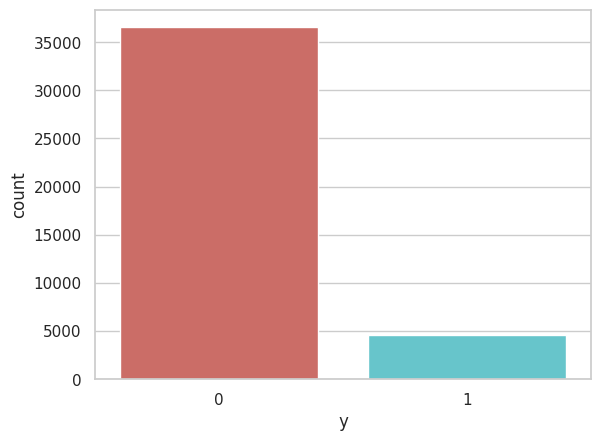

<Figure size 640x480 with 0 Axes>

In [9]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Il y a 36 548 "no" et 4 640 "yes" dans la variable cible (outcome).  

Voyons maintenant la répartition des données entre ces deux classes.

In [10]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include='number').columns

In [11]:

# Group by 'y' and compute the mean
data.groupby('y')[numeric_cols].mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                        
0  39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
1  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
y                                                              
0       93.603757     -40.593097   3.811491  5176.166600  0.0  
1       93.354386     -39.789784   2.123135  5095.115991  1.0

Observations :

- L’âge moyen des clients ayant souscrit au dépôt à terme est plus élevé que celui des clients ne l’ayant pas fait.  
- Le nombre de jours depuis le dernier contact (*pdays*) est logiquement plus faible pour les clients ayant souscrit. Plus *pdays* est bas, meilleure est la mémoire du dernier appel, ce qui augmente les chances de conclure une vente.  
- le nombre de contacts (*campaign*) est plus faible chez les clients ayant souscrit au dépôt à terme.


Nous pouvons calculer les moyennes par catégorie pour d'autres variables catégorielles telles que *education* et *marital status* afin d’obtenir une vision plus détaillée de nos données.


In [12]:
data.groupby('job')[numeric_cols].mean()

age    duration  campaign       pdays  previous  \
job                                                                    
admin.         38.187296  254.312128  2.623489  954.319229  0.189023   
blue-collar    39.555760  264.542360  2.558461  985.160363  0.122542   
entrepreneur   41.723214  263.267857  2.535714  981.267170  0.138736   
housemaid      45.500000  250.454717  2.639623  960.579245  0.137736   
management     42.362859  257.058140  2.476060  962.647059  0.185021   
retired        62.027326  273.712209  2.476744  897.936047  0.327326   
self-employed  39.949331  264.142153  2.660802  976.621393  0.143561   
services       37.926430  258.398085  2.587805  979.974049  0.154951   
student        25.894857  283.683429  2.104000  840.217143  0.524571   
technician     38.507638  250.232241  2.577339  964.408127  0.153789   
unemployed     39.733728  249.451677  2.564103  935.316568  0.199211   
unknown        45.563636  239.675758  2.648485  938.727273  0.154545   

               emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
job                                                                     
admin.             0.015563       93.534054     -40.245433   3.550274   
blue-collar        0.248995       93.656656     -41.375816   3.771996   
entrepreneur       0.158723       93.605372     -41.283654   3.791120   
housemaid          0.433396       93.676576     -39.495283   4.009645   
management        -0.012688       93.522755     -40.489466   3.611316   
retired           -0.698314       93.430786     -38.573081   2.770066   
self-employed      0.094159       93.559982     -40.488107   3.689376   
services           0.175359       93.634659     -41.290048   3.699187   
student           -1.408000       93.331613     -40.187543   1.884224   
technician         0.274566       93.561471     -39.927569   3.820401   
unemployed        -0.111736       93.563781     -40.007594   3.466583   
unknown            0.357879       93.718942     -38.797879   3.949033   

               nr.employed         y  
job                                   
admin.         5164.125350  0.129726  
blue-collar    5175.615150  0.068943  
entrepreneur   5176.313530  0.085165  
housemaid      5179.529623  0.100000  
management     5166.650513  0.112175  
retired        5122.262151  0.252326  
self-employed  5170.674384  0.104856  
services       5171.600126  0.081381  
student        5085.939086  0.314286  
technician     5175.648391  0.108260  
unemployed     5157.156509  0.142012  
unknown        5172.931818  0.112121

In [13]:
data.groupby('marital')[numeric_cols].mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons.price.idx  cons.conf.idx  euribor3m  nr.employed         y  
marital                                                                    
divorced       93.606563     -40.707069   3.715603  5170.878643  0.103209  
married        93.597367     -40.270659   3.745832  5171.848772  0.101573  
single         93.517300     -40.918698   3.317447  5155.199265  0.140041  
unknown        93.471250     -40.820000   3.313038  5157.393750  0.150000

In [14]:
data.groupby('education')[numeric_cols].mean()

age    duration  campaign       pdays  previous  \
education                                                                    
Basic                42.163910  263.043874  2.559498  974.877967  0.141053   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

                     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
education                                                                     
Basic                    0.191329       93.639933     -40.927595   3.729654   
high.school              0.032937       93.584857     -40.940641   3.556157   
illiterate              -0.133333       93.317333     -39.950000   3.516556   
professional.course      0.173012       93.569864     -40.124108   3.710457   
university.degree       -0.028090       93.493466     -39.975805   3.529663   
unknown                  0.059099       93.658615     -39.877816   3.571098   

                     nr.employed         y  
education                                   
Basic                5172.014113  0.087029  
high.school          5164.994735  0.108355  
illiterate           5171.777778  0.222222  
professional.course  5170.155979  0.113485  
university.degree    5163.226298  0.137245  
unknown              5159.549509  0.145003

### Visualizations

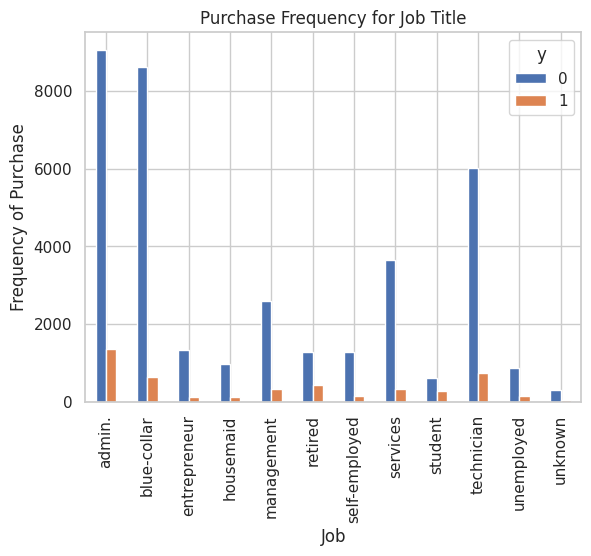

In [15]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

La fréquence de souscription au dépôt **dépend fortement** du type d’emploi.  
Ainsi, le type de poste peut être un bon prédicteur de la variable cible.


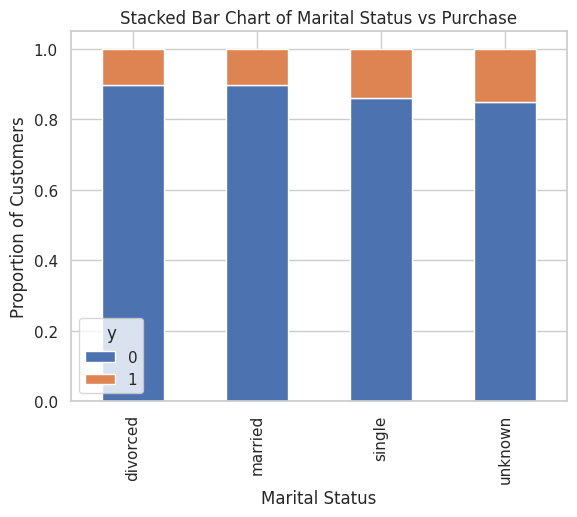

In [16]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Ce n’est pas évident à première vue, mais le statut marital **ne semble pas** être un bon prédicteur de la variable cible.

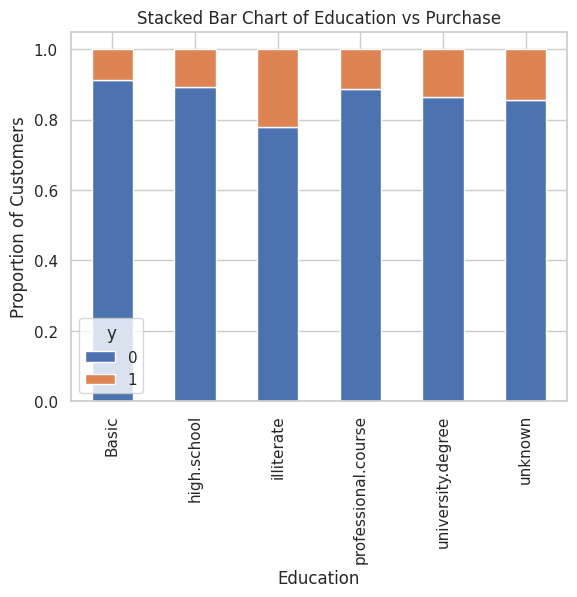

In [17]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Le niveau d’éducation semble être un **bon prédicteur** de la variable cible.


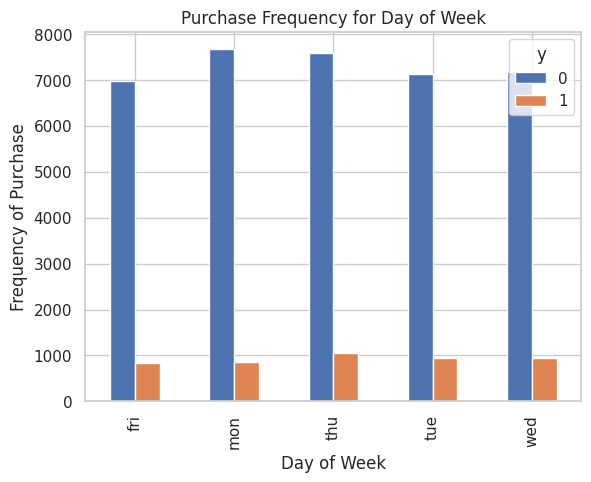

In [18]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Le jour de la semaine **ne semble pas** être un bon prédicteur de la variable cible.

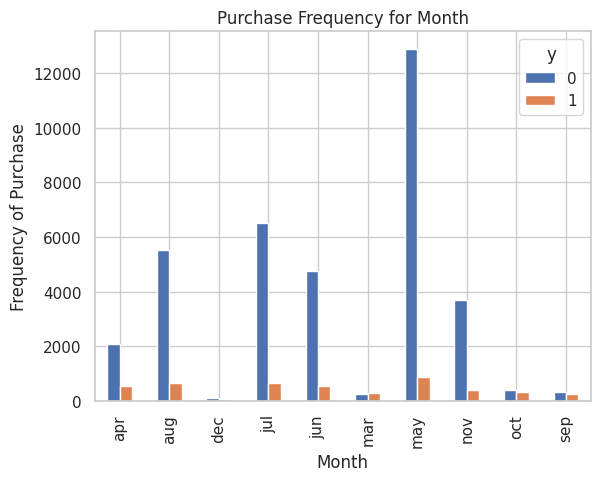

In [19]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Le mois *pourrait* être un **bon prédicteur** de la variable cible.

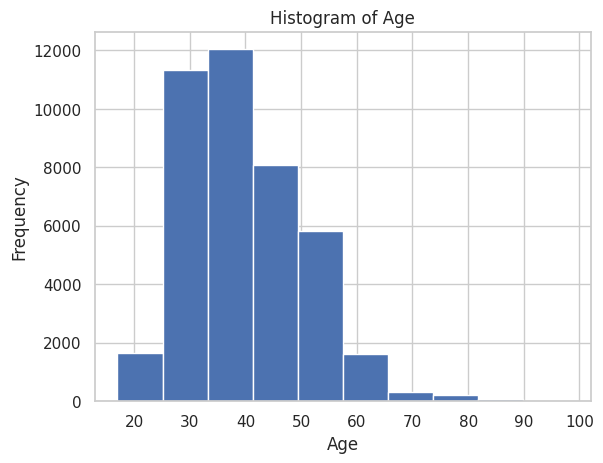

In [20]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

La majorité des clients de la banque dans ce jeu de données ont un âge compris entre 30 et 40 ans.

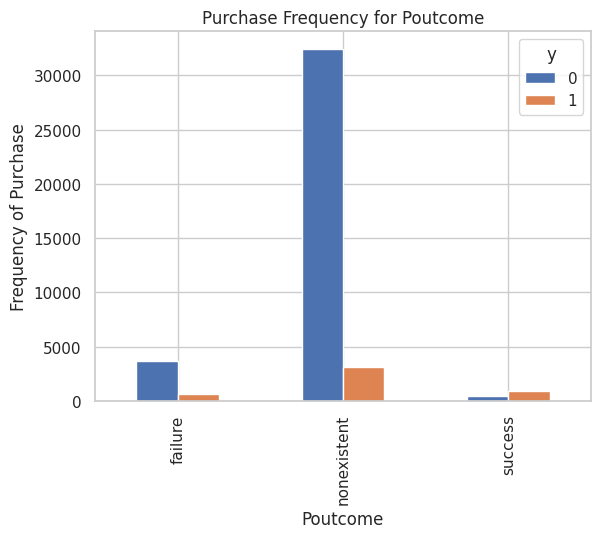

In [21]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

La variable *poutcome* semble être un bon prédicteur de la variable cible.

poutcome : résultat de la campagne marketing précédente (catégorique : 'failure','nonexistent','success')

### Create dummy variables

Dans cette section, nous avons transformé les variables catégorielles du jeu de données en variables numériques à l’aide de la technique du **one-hot encoding**.

#### Étapes détaillées :

1. **Liste des variables catégorielles** :  
   On a défini la liste `cat_vars` qui contient les noms des colonnes catégorielles à transformer.

2. **Encodage one-hot** :  
   Pour chaque variable dans `cat_vars`, on a utilisé `pd.get_dummies()` pour créer de nouvelles colonnes binaires (0 ou 1) correspondant à chaque catégorie.  
   Ces nouvelles colonnes ont été ajoutées au jeu de données original avec `data = data.join(cat_list)`.

3. **Nettoyage des colonnes d'origine** :  
   Après l'encodage, on a préparé une nouvelle liste de colonnes `to_keep` qui exclut les colonnes catégorielles d’origine (`cat_vars`), ne conservant que les colonnes utiles pour la modélisation.

> Le tableau final contient à la fois les variables numériques d'origine (comme `age`, `duration`, etc.) et les variables catégorielles encodées (comme `job_admin.`, `marital_single`, `education_high.school`, etc.), prêtes pour l'entraînement d’un modèle de machine learning.


In [22]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [23]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [24]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

**final shape**

In [25]:
data_final.shape

(41188, 62)

In [26]:
# Feature matrix and target
X = data_final.drop(columns=['y'])     
y = data_final['y']


## Feature Selection

### Sélection de variables avec RFE (Recursive Feature Elimination)

Dans cette étape, nous utilisons la **régression logistique** et la méthode **RFE** pour sélectionner les variables les plus importantes pour le modèle.

#### Étapes détaillées :

1. **Importation des modules nécessaires** :
   - `LogisticRegression` pour entraîner un modèle de régression logistique.
   - `RFE` (Recursive Feature Elimination) pour sélectionner les variables les plus pertinentes.
   - `StandardScaler` (importé mais non utilisé ici) pour normaliser les données si nécessaire.

2. **Initialisation du modèle** :
   - Un modèle de régression logistique est instancié avec le solveur `'liblinear'` et `max_iter=2000` pour garantir la convergence du modèle même en cas de grand nombre de variables.

3. **Sélection récursive des variables (RFE)** :
   - La méthode RFE est utilisée avec la régression logistique comme estimateur.
   - `n_features_to_select=18` signifie que l’on souhaite conserver les **18 variables les plus importantes**.
   - `rfe.fit(X, y.values.ravel())` entraîne la méthode RFE sur les données d’entrée `X` et les étiquettes `y`.

4. **Affichage des résultats** :
   - `rfe.support_` affiche un tableau booléen indiquant quelles colonnes ont été sélectionnées.
   - `rfe.ranking_` donne le rang de chaque variable (1 = sélectionnée).

> Cette méthode permet de réduire la dimensionnalité du jeu de données tout en conservant les variables les plus utiles à la prédiction.


In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Logistic regression with better solver and more iterations

logreg = LogisticRegression(solver='liblinear', max_iter=2000)

# Recursive Feature Elimination
rfe = RFE(estimator=logreg, n_features_to_select=18)
rfe = rfe.fit(X, y.values.ravel())

# Output
print(rfe.support_)
print(rfe.ranking_)


[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False  True False False False False False  True False False False
 False False False False False  True False  True  True False False False
  True  True  True False False False  True False False False  True  True
  True]
[35 33 13 41  1 14 17 18  1 28 12  1 26 40 42  1 32  1  1 20 22 39  7  8
  9 43  1  2 38  3  4  5  1 16 44 36 30 37 21 31 29  1 15  1  1 19 23 25
  1  1  1 24 10 11  1 34 27  6  1  1  1]


In [28]:
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
       'job_services', 'job_student', 'education_Basic', 'default_no',
       'contact_cellular', 'month_apr', 'month_aug', 'month_mar', 'month_may',
       'month_nov', 'day_of_week_mon', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


La méthode de sélection récursive des variables (RFE) nous a permis de sélectionner les variables suivantes :

- previous  
- euribor3m  
- job_blue-collar  
- job_retired  
- job_services  
- job_student  
- default_no  
- contact_cellular  
- month_apr  
- month_aug  
- month_mar  
- month_may  
- month_nov  
- day_of_week_mon  
- poutcome_failure  
- poutcome_nonexistent  
- poutcome_success

> Ces variables ont été identifiées comme étant les plus pertinentes pour la modélisation selon la régression logistique utilisée avec RFE.


In [29]:
data_final[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   previous              41188 non-null  int64  
 1   euribor3m             41188 non-null  float64
 2   job_blue-collar       41188 non-null  bool   
 3   job_retired           41188 non-null  bool   
 4   job_services          41188 non-null  bool   
 5   job_student           41188 non-null  bool   
 6   education_Basic       41188 non-null  bool   
 7   default_no            41188 non-null  bool   
 8   contact_cellular      41188 non-null  bool   
 9   month_apr             41188 non-null  bool   
 10  month_aug             41188 non-null  bool   
 11  month_mar             41188 non-null  bool   
 12  month_may             41188 non-null  bool   
 13  month_nov             41188 non-null  bool   
 14  day_of_week_mon       41188 non-null  bool   
 15  poutcome_failure   

In [ ]:
# Use only selected features (no .astype(int) to keep bool columns as in context)
X = data_final[selected_features]
y = data_final['y']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Implementing the model

In [32]:
import statsmodels.api as sm

# Fit logistic regression with statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Show results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.280399
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Tue, 13 May 2025   Pseudo R-squ.:                  0.2035
Time:                        11:04:19   Log-Likelihood:                -11549.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.1735      0.051      3.416      0.001       0.074       0.273

Les p-values pour la plupart des variables sont très petites, ce qui signifie que la majorité d’entre elles sont significatives pour le modèle.

## Cross Validation

### Using cross validation for more robust error measurement

L’utilisation d’un jeu de validation présente certains inconvénients.  
Premièrement, cela réduit la quantité de données utilisées pour l’entraînement.  
Deuxièmement, comme l’évaluation se fait sur un petit échantillon, le risque de surapprentissage (*overfitting*) est élevé.

Pour surmonter ces problèmes, on utilise une technique appelée **[validation croisée (cross validation)](https://scikit-learn.org/stable/modules/cross_validation.html)**.  
La forme la plus courante de validation croisée, et celle que nous allons utiliser, est appelée **validation croisée k-fold**.

- Le terme *fold* fait référence à chaque itération différente sur laquelle on entraîne le modèle.  
- La lettre *k* représente le nombre total de *folds*.

Dans le schéma ci-dessus, nous illustrons la validation croisée avec **k = 5**.

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

[source](https://scikit-learn.org/stable/modules/cross_validation.html)


In [33]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Define k-fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelCV = LogisticRegression(max_iter=1000)  # You can add other params here
scoring = 'accuracy'

# Cross-validation score (this does NOT fit modelCV permanently)
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % results.mean())

10-fold cross validation average accuracy: 0.90


Le score moyen de précision obtenu à partir de la validation croisée à 10 *folds* est de **90%**.

Cela signifie que :

- En moyenne, le modèle de régression logistique **fait des prédictions correctes dans 9 cas sur 10** sur les différentes divisions du jeu de données.
- Ce score élevé suggère que le modèle **généralise bien** sur des données qu’il n’a pas vues pendant l’entraînement.
- Le fait d’utiliser une validation croisée à 10 *folds* renforce la **fiabilité de l’évaluation**, car le modèle a été testé sur plusieurs sous-ensembles variés du jeu de données.
- Ce processus aide également à **réduire le risque de surapprentissage** (overfitting) que l’on aurait pu rencontrer avec un simple jeu de validation unique.


### Logistic Regression Model Fitting

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

#### Predicting the test set results and caculating the accuracy

#### Accuracy

In [ ]:
# Predict and evaluate
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy of logistic regression classifier on test set: {accuracy:.2f}")

Accuracy of logistic regression classifier on test set: 0.90


In [36]:
y_pred = logreg.predict(X_test)

### Confusion Matrix

## Décrire la performance d’un modèle de régression logistique

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*-QR9WF1n7jkzn4t1u57NNw.gif" width="700"/>

Une **matrice de confusion** est un tableau souvent utilisé pour décrire la performance d’un modèle de classification (ou "classifieur") sur un ensemble de données de test dont les vraies valeurs sont connues.  
Regardons quelques notions importantes associées à la matrice de confusion :

<img src="https://miro.medium.com/max/386/1*GMlSubndVt3g7FmeQjpeMA.png" width="700"/>

Exemple : matrice de confusion pour prédire si des employés quitteront ou non une entreprise.

### Ce que nous indique la matrice de confusion :

- Il y a deux classes possibles prédites : “yes” et “no”.  
  Si nous prédictions le départ des employés d’une organisation, “yes” signifie qu’ils vont partir, et “no” qu’ils vont rester.

- Le classifieur a effectué un total de **165 prédictions** (par exemple, 165 employés analysés).

- Parmi ces 165 cas :
  - Le modèle a prédit “yes” **110 fois**.
  - Et “no” **55 fois**.

- En réalité :
  - **105 employés** dans l’échantillon ont effectivement quitté l’entreprise.
  - Et **60 ne l’ont pas quittée**.


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10843   126]
 [ 1121   267]]


The result is telling us that we have 10843+267 correct predictions and 1121+126 incorrect predictions.

### Termes de base liés à la matrice de confusion :

* **Vrais positifs (TP)** : Ce sont les cas où nous avons prédit "yes" (les employés quitteront l’organisation), et ils partent effectivement. Exemple : **267**  
* **Vrais négatifs (TN)** : Nous avons prédit "no" (les employés ne quitteront pas l’organisation) et ils ne partent pas. Exemple : **10843**  
* **Faux positifs (FP)** : Nous avons prédit "yes" (ils vont partir), mais en réalité ils ne partent pas. (Aussi appelé **erreur de type I**) Exemple : **267**  
* **Faux négatifs (FN)** : Nous avons prédit "no" (ils ne vont pas partir), mais en réalité ils partent. (Aussi appelé **erreur de type II**) Exemple : **1121**

---

### Évaluation d’un modèle de classification

* **Accuracy (Précision globale)** :  
  Formule : *(TP + TN) / Total*  
  Elle décrit dans quelle mesure le classifieur est globalement correct.  
  = (267 + 10843) / (10843 + 126 + 1121 + 267)  
  = 11110 / 12357 ≈ **0.90** → **90%**
---
Les mesures de **sensibilité** et de **spécificité** sont des indicateurs statistiques de la performance d’un test de classification binaire :

* **Sensibilité / Rappel (Recall)** = TP / (TP + FN)  
  Quand la réponse réelle est *yes*, à quelle fréquence le modèle prédit-il *yes* ?  
  = 267 / (267 + 1121)  
  = 267 / 1388 ≈ **0.19** → **19%**

* **Spécificité** = TN / (TN + FP)  
  Quand la réponse réelle est *no*, à quelle fréquence le modèle prédit-il *no* ?
  = 10843 / (10843 + 126)  
  = 10843 / 10969 ≈ **0.99** → **99%**



* **Précision (Precision)** = TP / (TP + FP)
  Quand le modèle prédit *yes*, à quelle fréquence a-t-il raison ?
  = 267 / (267 + 126)  
  = 267 / 393 ≈ **0.68** → **68%**

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.68      0.19      0.30      1388

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.


#### Interprétation :

Sur l’ensemble du jeu de test :

- **88 %** des dépôts à terme promus étaient effectivement ceux que les clients ont appréciés.  
- **90 %** des dépôts à terme préférés par les clients ont été promus.
----
- Environ **68 %** des dépôts à terme promus ont effectivement été souscrits par les clients. (C’est la **précision**)
- Environ **19 %** des clients qui étaient réellement intéressés par le dépôt à terme l’ont effectivement reçu en promotion. (C’est le **rappel**)

> Autrement dit :
- Le modèle est **précis** dans ses prédictions positives (lorsqu’il recommande un dépôt à terme, il a souvent raison).
- Mais il **manque beaucoup de clients intéressés** (faible rappel), ce qui signifie qu’un grand nombre de clients intéressés ne reçoivent pas la promotion.

Cette situation est typique dans les cas où les classes sont déséquilibrées et où le modèle est très conservateur dans ses prédictions positives.


### ROC Curvefrom 


### Métriques d’évaluation des performances d’un modèle de classification

**Courbe ROC**

La **courbe ROC (Receiver Operator Characteristic)** permet d’aider à déterminer la meilleure valeur seuil pour classifier les observations.  
Elle est obtenue en traçant le Taux de Vrais Positifs (axe des y) en fonction du Taux de Faux Positifs (axe des x), pour différentes valeurs de seuil.

> La courbe ROC se termine toujours en (1,1).  
> À ce point, le seuil est 0, ce qui signifie que **toutes** les observations sont classées comme appartenant à la classe 1 (la spécificité est alors nulle, et le taux de faux positifs est égal à 1).

Le **choix du meilleur seuil dépend du compromis que vous souhaitez faire** :  
Selon la criticité de l’application métier, il faut comparer le **coût de rater des vrais positifs** (faux négatifs) avec le **coût de générer de fausses alertes** (faux positifs).

<img src="https://miro.medium.com/max/469/1*Y65IEOXvxLRKKqWxlQovsg.png" width="500"/>

Une animation pour illustrer comment la courbe ROC est liée à la sensibilité et la spécificité pour toutes les valeurs de seuil possibles :

<img src="https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif?raw=true" width="500"/>

---

**Seuil élevé (High Threshold) :**
* Spécificité élevée
* Sensibilité faible

**Seuil bas (Low Threshold) :**
* Spécificité faible
* Sensibilité élevée

---

La surface sous la courbe ROC est appelée **AUC (Area Under the Curve)**.  
L’AUC indique le **taux de classification correcte** obtenu par le modèle de régression logistique.  
Plus l’AUC est proche de 1, **meilleure est la performance du modèle**.


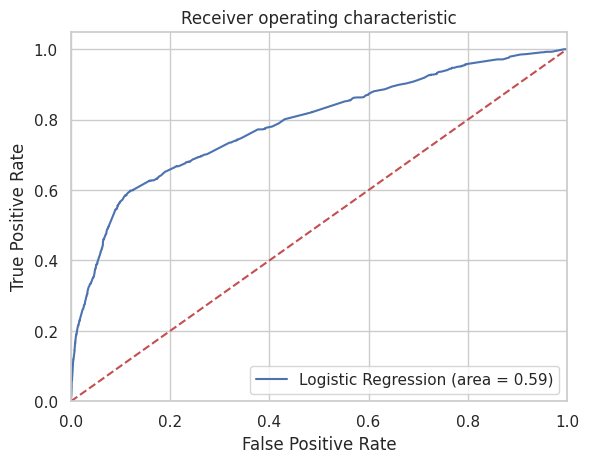

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# Use predicted probabilities for AUC as in context
y_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Interprétation de la courbe ROC

La courbe ROC ci-dessus représente la performance du modèle de **régression logistique**.

- L’**axe vertical (y)** indique le **Taux de Vrais Positifs** (*True Positive Rate* ou *Recall*).
- L’**axe horizontal (x)** indique le **Taux de Faux Positifs** (*False Positive Rate*).

La courbe bleue montre comment le modèle se comporte à différents seuils de classification.

#### Analyse du score AUC :
- Le **score AUC (Area Under the Curve)** est de **0.59**.
- Une AUC de 0.5 correspond à un modèle aléatoire (la ligne rouge pointillée).
- Une AUC de 0.59 est **légèrement meilleure qu’un modèle aléatoire**, mais **insuffisante pour un bon modèle prédictif**.

#### Interprétation globale :
- Le modèle **parvient à distinguer la classe positive de la classe négative un peu mieux que le hasard**, mais sa performance reste **faible**.
- Cela suggère que :
  - Les données sont déséquilibrées 

## 🎯 Interprétation spécifique au déséquilibre des classes

Lorsque les classes sont déséquilibrées, cela signifie qu’une classe (par exemple "non souscription") est beaucoup plus fréquente que l’autre (par exemple "souscription").

Dans ce contexte :
- Le modèle peut apprendre à **prédire toujours la classe majoritaire** pour obtenir une précision élevée.
- Mais il **échoue souvent à détecter la classe minoritaire**, ce qui se traduit par :
  - Un **rappel faible**
  - Une **courbe ROC peu marquée** (AUC faible)

C’est pourquoi, malgré une précision globale de 90 %, l’AUC est seulement de 0.59 :  
le modèle **ne sait pas bien distinguer les clients réellement intéressés par le dépôt à terme**.
